In [1]:
from keras.applications.inception_v3 import InceptionV3
from keras.callbacks import Callback
from keras.models import Model
from keras.optimizers import RMSprop, Adam
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation, Convolution2D
from keras.layers.core import Lambda
from keras.applications.inception_v3 import preprocess_input
from keras.layers import GlobalAveragePooling2D 
from keras.applications.xception import Xception
from keras.callbacks import EarlyStopping
import tensorflow as tf
import cv2
import tqdm
import pickle
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random

import glob
import matplotlib.image as mpimg
from sklearn.cross_validation import train_test_split
from sklearn.utils import shuffle

np.random.seed(12)

image_shape = (64, 64, 3)
n_classes = 2

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Neural Network Classifier

In [2]:
def extract_image_features(imgs):
    features = []
    for file in imgs:
        # Read in each one by one
        img = mpimg.imread(file)
        img = cv2.resize(img, (64, 64))
        features.append(np.asanyarray(img * 255.0, dtype=np.uint8))
    return features

In [3]:
cars = []
notcars = []
cars = glob.glob('./data/vehicles/GTI_Far/*.png')
cars = cars + glob.glob('./data/vehicles/GTI_Left/*.png')
cars = cars + glob.glob('./data/vehicles/GTI_MiddleClose/*.png')
cars = cars + glob.glob('./data/vehicles/GTI_Right/*.png')
cars = cars + glob.glob('./data/vehicles/KITTI_extracted/*.png')
notcars = notcars + glob.glob('./data/non-vehicles/GTI/*.png')
notcars = notcars + glob.glob('./data/non-vehicles/Extras/*.png')

features = extract_image_features(cars + notcars)
y = np.hstack((np.ones(len(cars)), np.zeros(len(notcars))))

features = np.asarray(features)
y = np.asarray(y, dtype=np.uint8)

y_onehot = np.zeros((y.shape[0], n_classes), dtype=np.uint8)
for i in range(y.shape[0]):
    y_onehot[i][y[i]] = 1
    
y = y_onehot

In [4]:
y.shape

(17760, 2)

In [5]:
features, y = shuffle(features, y)
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2)

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
def roadSignNet():
    model_ = Sequential()

    model_.add(Conv2D(32, (3, 3), padding='same', input_shape=image_shape, activation='relu'))
    model_.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model_.add(MaxPooling2D(pool_size=(2, 2)))

    model_.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model_.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model_.add(MaxPooling2D(pool_size=(2, 2)))

    model_.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model_.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model_.add(MaxPooling2D(pool_size=(2, 2)))

    model_.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model_.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model_.add(MaxPooling2D(pool_size=(2, 2)))

    model_.add(Flatten())
    model_.add(Dense(256, activation='relu'))
    model_.add(Dropout(0.5))

    model_.add(Dense(256, activation='relu'))
    model_.add(Dropout(0.5))

    model_.add(Dense(n_classes))
    model_.add(Activation('softmax'))
    return model_

In [7]:
model_complicate = roadSignNet()
model_complicate.summary()
model_complicate.compile(optimizer=RMSprop(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)       73856     
__________

In [8]:
h = model_complicate.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
14208/14208 [==============================] - 11s 787us/step - loss: 0.2974 - acc: 0.8777
Epoch 2/10
14208/14208 [==============================] - 9s 649us/step - loss: 0.0994 - acc: 0.9704
Epoch 3/10
14208/14208 [==============================] - 9s 657us/step - loss: 0.0606 - acc: 0.9849
Epoch 4/10
14208/14208 [==============================] - 9s 646us/step - loss: 0.0614 - acc: 0.9859
Epoch 5/10
14208/14208 [==============================] - 9s 648us/step - loss: 0.0480 - acc: 0.9894
Epoch 6/10
14208/14208 [==============================] - 9s 647us/step - loss: 0.0405 - acc: 0.9905
Epoch 7/10
14208/14208 [==============================] - 9s 648us/step - loss: 0.0331 - acc: 0.9928
Epoch 8/10
14208/14208 [==============================] - 9s 647us/step - loss: 0.0421 - acc: 0.9931
Epoch 9/10
14208/14208 [==============================] - 9s 643us/step - loss: 0.0428 - acc: 0.9930
Epoch 10/10
14208/14208 [==============================] - 9s 644us/step - loss: 0.0536 - 

In [9]:
y_pred = model_complicate.predict(X_test, batch_size=32)

I am 100.00% sure this is a  car


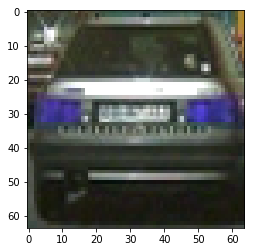

I am 100.00% sure this is a  car


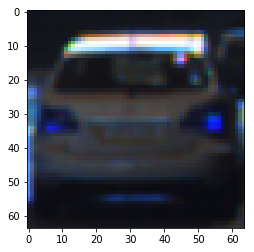

I am 100.00% sure this is a  non-car


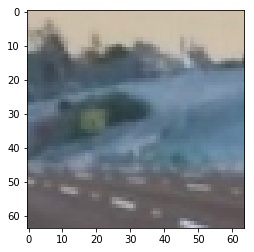

I am 100.00% sure this is a  non-car


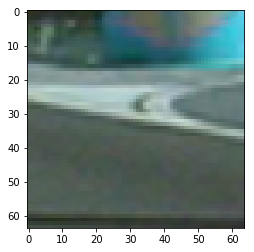

I am 100.00% sure this is a  non-car


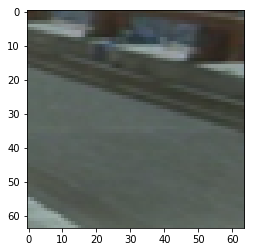

I am 100.00% sure this is a  non-car


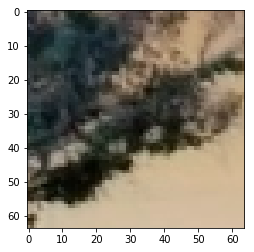

I am 100.00% sure this is a  car


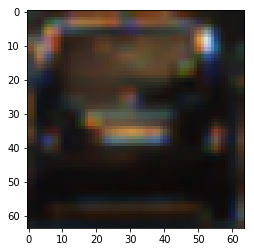

I am 99.95% sure this is a  car


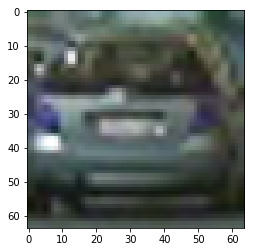

I am 100.00% sure this is a  non-car


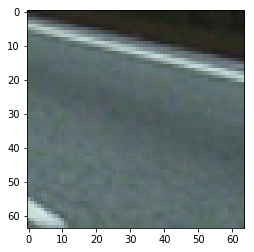

I am 100.00% sure this is a  car


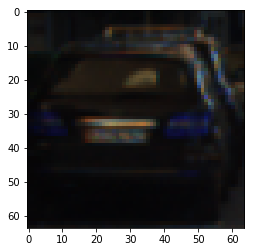

I am 100.00% sure this is a  non-car


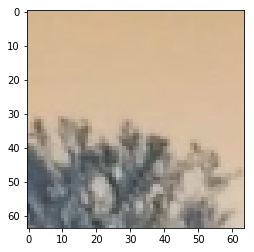

I am 100.00% sure this is a  non-car


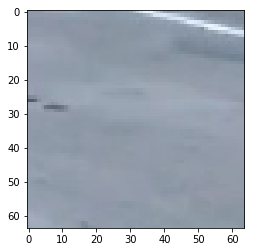

In [10]:
index = np.argmax(y_pred[0])
n_test = y_test.shape[0]
SignName = {0:'non-car', 1:'car'}
for i in range(12):
    random_index = random.randint(0, n_test - 1)
    index = np.argmax(y_pred[random_index])
    print('I am {:.2%} sure this is a '.format(y_pred[random_index, index]), SignName[index])
    plt.imshow(X_test[random_index][:,:,::-1])
    plt.show()

In [11]:
model_complicate.save_weights('w_nn.h5')

# Hog Bin Hist Classifier

In [12]:
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
import time
def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    if conv == 'RGB2HSV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    if conv == 'RGB2HLS':
        return cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    if conv == 'RGB2YUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YUV)


def get_hog_features(img, orient, pix_per_cell, cell_per_block,
                     vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient,
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block),
                                  transform_sqrt=False,
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:
        features = hog(img, orientations=orient,
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block),
                       transform_sqrt=False,
                       visualise=vis, feature_vector=feature_vec)
        return features


def bin_spatial(img, size=(32, 32)):
    color1 = cv2.resize(img[:, :, 0], size).ravel()
    color2 = cv2.resize(img[:, :, 1], size).ravel()
    color3 = cv2.resize(img[:, :, 2], size).ravel()
    return np.hstack((color1, color2, color3))


def color_hist(img, nbins=32):  # bins_range=(0, 256)
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:, :, 0], bins=nbins)
    channel2_hist = np.histogram(img[:, :, 1], bins=nbins)
    channel3_hist = np.histogram(img[:, :, 2], bins=nbins)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

### TODO: Tweak these parameters and see how the results change.
color_space = 'RGB' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [None, None] # Min and max in y to search in slide_window()

In [13]:
from sklearn.utils import shuffle

cars = []
notcars = []
cars = glob.glob('./data/vehicles/GTI_Far/*.png')
cars = cars + glob.glob('./data/vehicles/GTI_Left/*.png')
cars = cars + glob.glob('./data/vehicles/GTI_MiddleClose/*.png')
cars = cars + glob.glob('./data/vehicles/GTI_Right/*.png')
cars = cars + glob.glob('./data/vehicles/KITTI_extracted/*.png')
notcars = notcars + glob.glob('./data/non-vehicles/GTI/*.png')
notcars = notcars + glob.glob('./data/non-vehicles/Extras/*.png')

def extract_image_features(imgs):
    features = []
    for file in imgs:
        file_features = []
        # Read in each one by one
        img = mpimg.imread(file)
        img = cv2.resize(img, (64, 64))
        img = convert_color(img, 'RGB2HLS')
        ch1 = img[:,:,0]
        ch2 = img[:,:,1]
        ch3 = img[:,:,2]
        hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
        hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
        hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
        hog_features = np.hstack((hog1.ravel(), hog2.ravel(), hog3.ravel()))
        # Get color features
        spatial_features = bin_spatial(img, size=spatial_size)
        hist_features = color_hist(img, nbins=hist_bins)
        # Scale features and make a prediction
        test_stack = np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1)

        file_features.append(spatial_features)
        file_features.append(hist_features)
        file_features.append(hog_features)

        features.append(np.concatenate(file_features))
    return features

features = extract_image_features(cars + notcars)

X = np.asarray(features, dtype=np.float64)
# Define the labels vector
y = np.hstack((np.ones(len(cars)), np.zeros(len(notcars))))
X, y = shuffle(X, y)

# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=rand_state)

# Use a linear SVC
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

svc_objects = { 
    "svc": svc, 
    "scaler": X_scaler, 
    "orient": orient, 
    "pix_per_cell": pix_per_cell,
    "spatial_size": spatial_size, 
    "hist_bins": hist_bins, 
    "cell_per_block": cell_per_block
}
pickle.dump( svc_objects, open( "svc_pickle.p", "wb" ) )

/usr/local/lib/python3.5/dist-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


24.57 Seconds to train SVC...
Test Accuracy of SVC =  0.9916
My SVC predicts:  [ 0.  0.  1.  1.  1.  0.  1.  1.  0.  0.]
For these 10 labels:  [ 0.  0.  1.  1.  1.  0.  1.  1.  0.  0.]
0.00738 Seconds to predict 10 labels with SVC
